In [21]:
import pandas as pd 

In [28]:
df = pd.read_csv(r'data\listingsValencia.csv')

In [30]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

### CAMBIO DE TIPOS

In [34]:
# lo primero que podemos comprobar es el tipo de dato de cada columna
df.dtypes

id                                         int64
name                                      object
host_id                                    int64
host_name                                 object
neighbourhood_group                       object
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                                 object
price                                    float64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
number_of_reviews_ltm                      int64
license                                   object
dtype: object

In [33]:
#cambiamos lastreview de object a datetime
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')

In [32]:
df.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,48154,Precioso apartamento con wifi,219476,Antonio,LA SAIDIA,MORVEDRE,39.48375,-0.37502,Entire home/apt,154.0,3,177,2024-12-01,1.01,4,177,27,VT-41540-V
1,137143,PENTHOUSE ON FRONT LINE BEACH,670775,Cpi Gestión Encuentra Tu Mansión,POBLATS DEL SUD,EL SALER,39.36335,-0.31932,Entire home/apt,390.0,10,1,2013-07-02,0.01,5,64,0,VT32745V


In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
import sys
!{sys.executable} -m pip install seaborn


  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


#### Comprobación de duplicados

In [46]:
df.duplicated().sum() #comprueba si hay duplicados

np.int64(0)

In [60]:
#comprobación de duplicados parciales
df_dup = df[df.duplicated(subset=['name', 'price', 'latitude', 'longitude'], keep=False)]
print(df_dup)


                       id                                        name  \
211               5956116         3 Bedrooms Apartment with free WIFI   
212               5956427         3 Bedrooms Apartment with free WIFI   
213               5956789         3 Bedrooms Apartment with free WIFI   
216               5957190      Centric 3 bedrooms Apartment with WIFI   
217               5957237      Centric 3 bedrooms Apartment with WIFI   
302               8399670      Centric 3 bedrooms Apartment with WIFI   
304               8399979      Centric 3 bedrooms Apartment with WIFI   
305               8400164      Centric 3 bedrooms Apartment with WIFI   
1340             26951498                  Bergamot House Single Room   
1344             26956688                 Bergamot House Double Suite   
1348             27013946               Bergamot House Suite Superior   
1349             27014295               Bergamot House Suite Superior   
1350             27014310               Bergamot Ho

In [62]:
df_dup.duplicated().sum() #comprueba si hay duplicados en las columnas seleccionadas

np.int64(0)

In [64]:
df_dup.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
211,5956116,3 Bedrooms Apartment with free WIFI,30912672,Apartamentos FV Flats Valencia,CAMINS AL GRAU,ALBORS,39.4696,-0.35387,Entire home/apt,186.0,2,47,2025-02-15,0.39,15,111,6,VT-32553-V
212,5956427,3 Bedrooms Apartment with free WIFI,30912672,Apartamentos FV Flats Valencia,CAMINS AL GRAU,ALBORS,39.4696,-0.35387,Entire home/apt,186.0,2,21,2025-01-03,0.19,15,110,3,VT-32555-V


In [65]:
# Mostrar todas las filas duplicadas (considerando todas las columnas)
duplicados = df[df.duplicated(keep=False)]

print("Filas duplicadas (todas las columnas):")
print(duplicados)


Filas duplicadas (todas las columnas):
Empty DataFrame
Columns: [id, name, host_id, host_name, neighbourhood_group, neighbourhood, latitude, longitude, room_type, price, minimum_nights, number_of_reviews, last_review, reviews_per_month, calculated_host_listings_count, availability_365, number_of_reviews_ltm, license]
Index: []


### comprobación de nulos

In [66]:
df.isnull().sum() #comprueba si hay valores nulos

id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                              689
minimum_nights                       0
number_of_reviews                    0
last_review                       1553
reviews_per_month                 1553
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                           6234
dtype: int64

In [67]:
df.isnull().sum() / len(df) * 100 #porcentaje de valores nulos por columna

id                                 0.000000
name                               0.000000
host_id                            0.000000
host_name                          0.000000
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              7.787951
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       17.553973
reviews_per_month                 17.553973
calculated_host_listings_count     0.000000
availability_365                   0.000000
number_of_reviews_ltm              0.000000
license                           70.464564
dtype: float64

In [68]:
df['reviews_per_month'].max() #valor mínimo de la columna reviews_per_month

np.float64(34.85)

<Axes: >

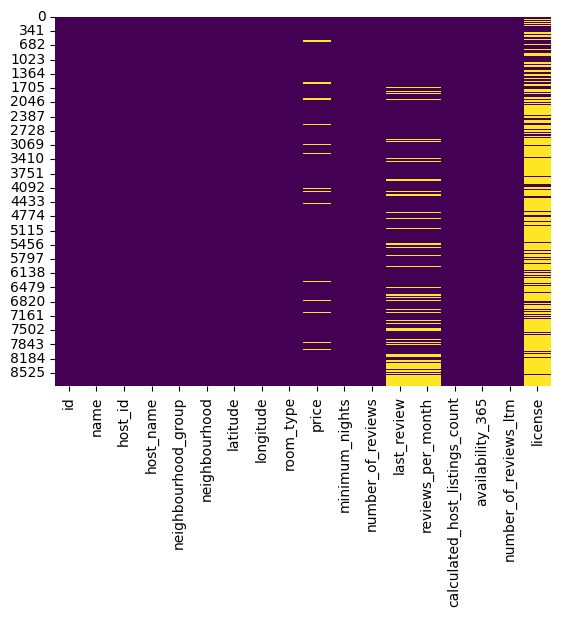

In [69]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis') #visualiza los valores nulos